<a href="https://colab.research.google.com/github/yuliadwir/Final_Project/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **House Rent In India Prediction**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from scipy.stats import probplot, boxcox
import matplotlib.pyplot as plt

# **Loading Dataset**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving House_Rent_Dataset.csv to House_Rent_Dataset.csv


In [ ]:
df =  pd.read_csv('House_Rent_Dataset.csv')
df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [ ]:
df.head(5)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [ ]:
df['Area Type'].unique()

array(['Super Area', 'Carpet Area', 'Built Area'], dtype=object)

In [ ]:
df['Furnishing Status'].unique()

array(['Unfurnished', 'Semi-Furnished', 'Furnished'], dtype=object)

In [ ]:
df['Tenant Preferred'].unique()

array(['Bachelors/Family', 'Bachelors', 'Family'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [ ]:
df.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [ ]:
df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [ ]:
df.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

# **EDA (Exploratory Data Analys)**

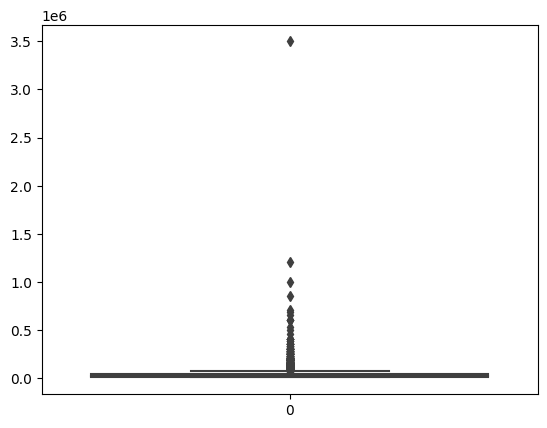

In [ ]:
fig1 = sns.boxplot(df['Rent'])

In [ ]:
persentile25 = df['Rent'].quantile(0.25)
persentile75 = df['Rent'].quantile(0.75)
IQR = persentile75-persentile25
Upper = persentile75+1.5*IQR
Lower = persentile25-1.5*IQR

In [ ]:
df_new =df[df['Rent']<Upper]
df_new = df_new [df_new['Rent']>Lower]
df_new

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


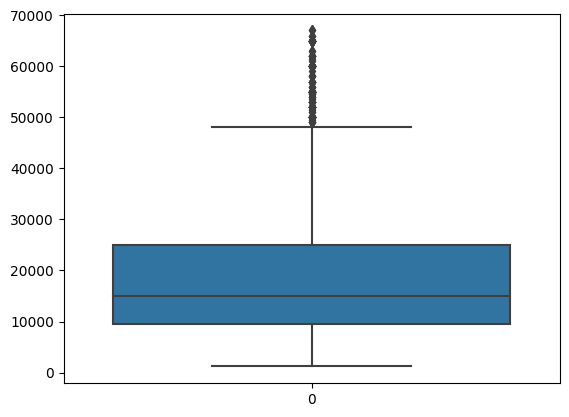

In [ ]:
fig1 = sns.boxplot(df_new['Rent'])

In [ ]:
df_new['Rent'].describe()

count     4226.000000
mean     19286.162565
std      13825.395996
min       1200.000000
25%       9500.000000
50%      15000.000000
75%      25000.000000
max      67000.000000
Name: Rent, dtype: float64

<Axes: xlabel='Rent', ylabel='Count'>

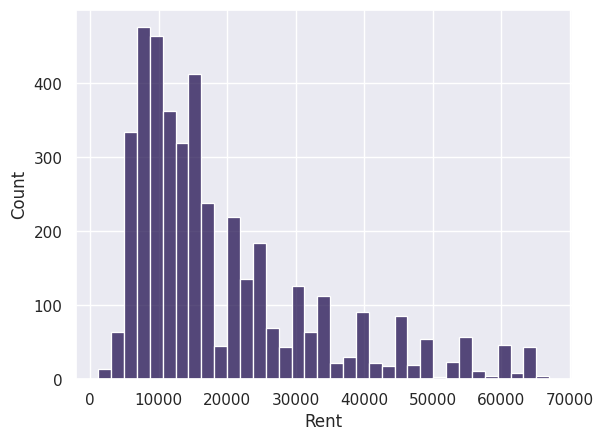

In [ ]:
sns.set_theme(palette='magma')
sns.histplot(df_new['Rent'])

<Axes: xlabel='Size', ylabel='Rent'>

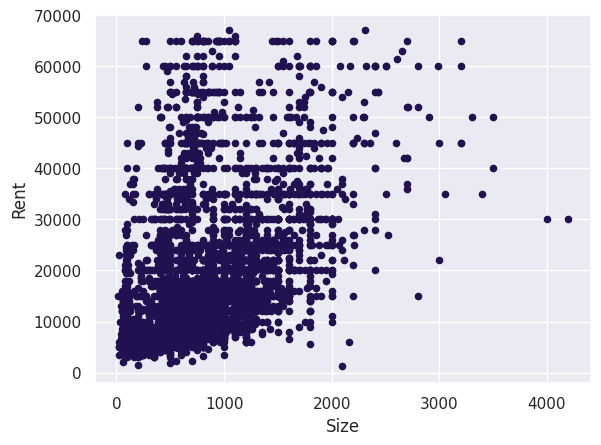

In [ ]:
df_new.plot.scatter(x='Size', y='Rent')

In [ ]:
fig=px.bar(df_new['BHK'].value_counts(),
       color=df_new['BHK'].value_counts(),
       text=df_new['BHK'].value_counts(),
       title='BAR PLOT OF BEDROOMS')
fig.update_layout(xaxis_title='Bed rooms count',yaxis_title='Total No.of Bedrooms')

In [ ]:
num_col = ['BHK', 'Rent','Floor','Size', 'Bathroom']
cat_col = ['Area Type', 'City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact']

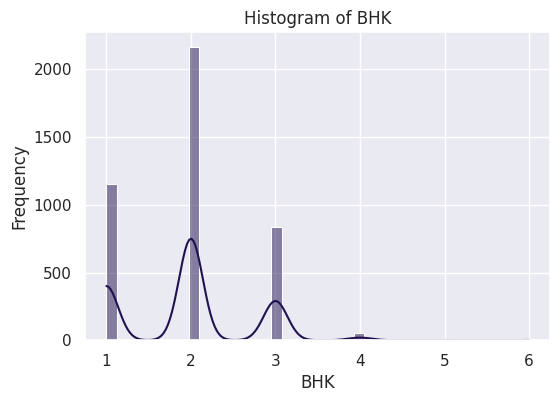

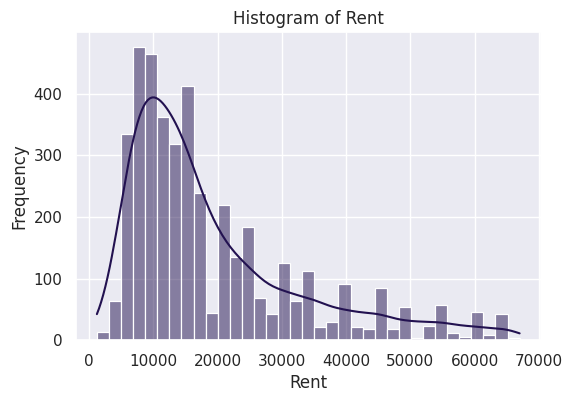

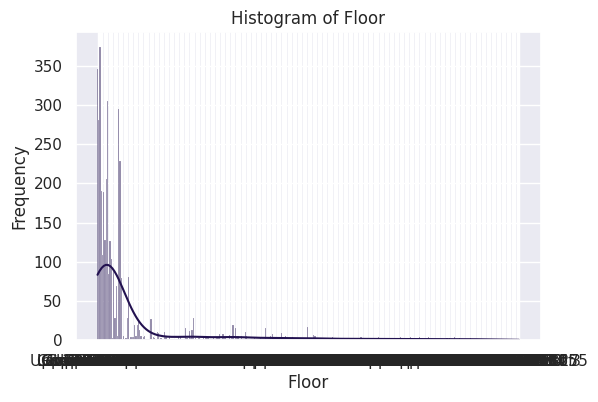

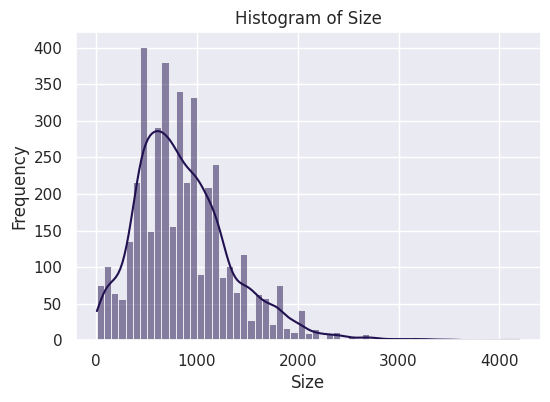

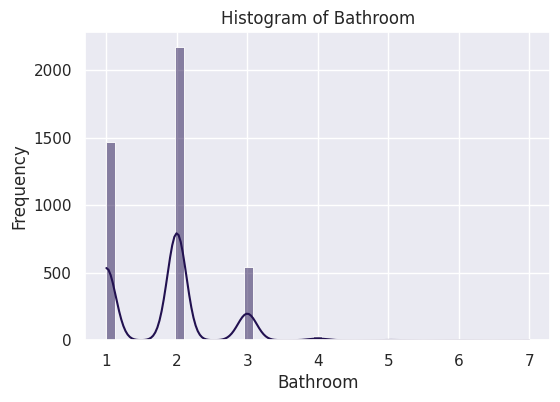

In [ ]:
for column in num_col:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df_new[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

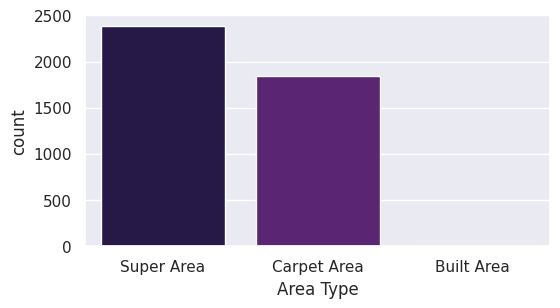

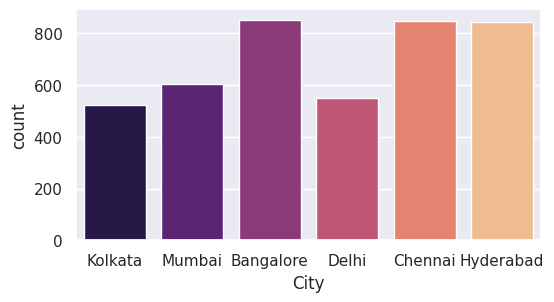

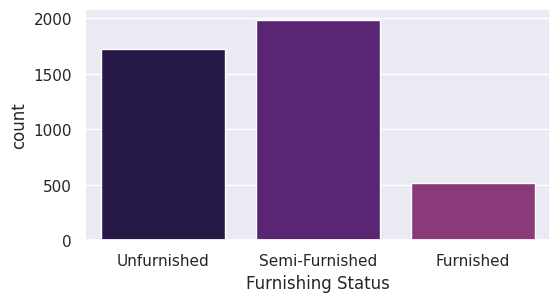

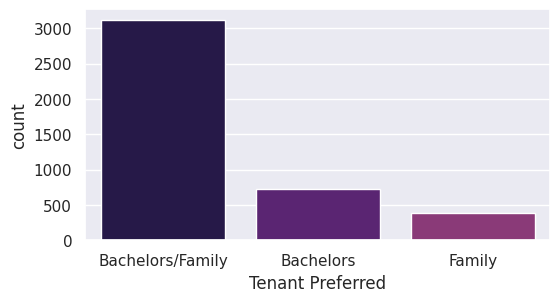

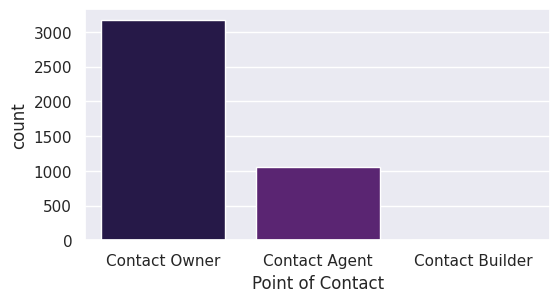

In [ ]:
for category in cat_col:
  plt.figure(figsize=(6,3))
  sns.countplot(data=df_new, x=category)


<ipython-input-23-40eddfa6e87b>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



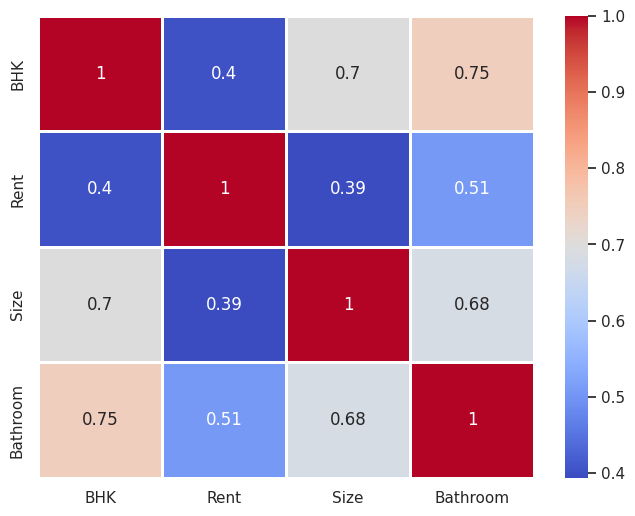

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.heatmap(df_new.corr(), cmap = "coolwarm", annot=True, linewidth=2)

# **Data Preprocessing**

In [ ]:
def feature_floor_split(r: pd.core.series.Series):
    if ' out of ' in r['Floor']:
        floor, max_floors = r['Floor'].split(' out of ')
        return [
            -1 if 'Basement' in floor else int(floor)
            , int(max_floors)
        ]
    # This accounts for the values where instead of having a floor like "1 out of 3", it just has "1".
    return [int(r['Floor'].split(' out of ')[0]), None]

def feature_is_basement(r: pd.core.series.Series) -> str:
    if 'Basement' in r['Floor']:
        return 1
    return 0

In [ ]:
df_new['Floor'] = df_new['Floor'].str.replace('Ground', '0')
df_new

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,0 out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [ ]:
df_new['Basement'] = df_new.apply(lambda row: feature_is_basement(row), axis=1)
df_new['Floor Number'] = df_new.apply(lambda row: feature_floor_split(row)[0], axis=1)
df_new['Building Floor'] = df_new.apply(lambda row: feature_floor_split(row)[1], axis=1)
df_new

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Basement,Floor Number,Building Floor
0,2022-05-18,2,10000,1100,0 out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,0,0,2.0
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,0,1,3.0
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,0,1,3.0
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,0,1,2.0
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,0,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner,0,3,5.0
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner,0,1,4.0
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent,0,3,5.0
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent,0,23,34.0


In [ ]:
df_new = df_new.drop(columns = ['Posted On', 'Floor'])
df_new.isnull().sum()

BHK                  0
Rent                 0
Size                 0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
Basement             0
Floor Number         0
Building Floor       4
dtype: int64

In [ ]:
df_new['Building Floor'] = df_new['Building Floor'].fillna(0)
df_new['Building Floor'].value_counts()

4.0     893
3.0     884
2.0     852
5.0     407
1.0     322
7.0     147
6.0      86
8.0      69
14.0     51
10.0     47
20.0     45
12.0     45
22.0     32
16.0     30
18.0     30
9.0      29
15.0     27
23.0     24
13.0     23
19.0     23
11.0     21
24.0     19
17.0     19
21.0     12
31.0      9
32.0      9
28.0      8
30.0      8
25.0      7
36.0      5
40.0      4
58.0      4
35.0      4
0.0       4
38.0      3
34.0      3
29.0      3
43.0      3
27.0      3
37.0      3
42.0      2
26.0      1
68.0      1
62.0      1
44.0      1
45.0      1
48.0      1
33.0      1
Name: Building Floor, dtype: int64

In [ ]:
tmp_data = df_new.copy()
from sklearn.preprocessing import LabelEncoder
cols = ('Area Type', 'Area Locality', 'City','Furnishing Status','Tenant Preferred','Point of Contact')
encoders = {}

for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(tmp_data[c].values))
    tmp_data[c] = lbl.transform(list(tmp_data[c].values))
    encoders[c] = lbl

In [ ]:
tmp_data

,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Basement,Floor Number,Building Floor
0,2,10000,1100,2,196,4,2,1,2,2,0,0,2.0
1,2,20000,800,2,1359,4,1,1,1,2,0,1,3.0
2,2,17000,1000,2,1568,4,1,1,1,2,0,1,3.0
3,2,10000,800,2,473,4,2,1,1,2,0,1,2.0
4,2,7500,850,1,1685,4,2,0,1,2,0,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,1,194,3,1,1,2,2,0,3,5.0
4742,3,29000,2000,2,1076,3,1,1,3,2,0,1,4.0
4743,3,35000,1750,1,655,3,1,1,3,0,0,3,5.0
4744,3,45000,1500,1,533,3,1,2,2,0,0,23,34.0


# **MODEL**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

np.random.seed(10)

X_train, X_test, y_train, y_test = train_test_split(
    tmp_data.loc[:, tmp_data.columns != 'Rent']
    , tmp_data['Rent']
    , test_size=0.2
    , random_state=1
)


In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((3380, 12), (846, 12), (3380,), (846,))

In [ ]:
X_test.isnull().sum()

BHK                  0
Size                 0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
Basement             0
Floor Number         0
Building Floor       0
dtype: int64

In [ ]:
X_train.isnull().sum()

BHK                  0
Size                 0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
Basement             0
Floor Number         0
Building Floor       0
dtype: int64

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

KNN = KNeighborsClassifier(n_neighbors=3)
RFC = RandomForestClassifier (n_estimators = 7, criterion = 'entropy', random_state = 7)
SVC = SVC()
LR = LogisticRegression()

for clf in (RFC, KNN, SVC, LR):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_train)
    print ('Accuracy Score Of ',
           clf.__class__.__name__,
           "=", 100*metrics.accuracy_score(y_train,
                                           y_pred))

Accuracy Score Of  RandomForestClassifier = 96.18343195266273
Accuracy Score Of  KNeighborsClassifier = 37.721893491124256
Accuracy Score Of  SVC = 8.49112426035503
Accuracy Score Of  LogisticRegression = 6.7455621301775155


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
for clf in (RFC, KNN, SVC, LR):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print ('Accuracy Score Of ',
           clf.__class__.__name__,"=",
           100*metrics.accuracy_score(y_test,
                        y_pred))

Accuracy Score Of  RandomForestClassifier = 7.092198581560284
Accuracy Score Of  KNeighborsClassifier = 5.555555555555555
Accuracy Score Of  SVC = 8.51063829787234
Accuracy Score Of  LogisticRegression = 6.028368794326241


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
import pickle

In [ ]:
pickle.dump(RFC, open('Random_Forest_Model.pkl','wb'))